In [3]:
# ładujemy otagowane dane
import pandas as pd

dataset = pd.read_csv("tagged_data.csv")

# dzielimy dane
from sklearn.model_selection import train_test_split

X = dataset.tweet
y = dataset.prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plot
from sklearn.metrics import roc_auc_score
def draw_roc(name, prediction):
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    plot.figure()
    plot.title(name)
    plot.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
    plot.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plot.legend(loc="lower right")
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.show()



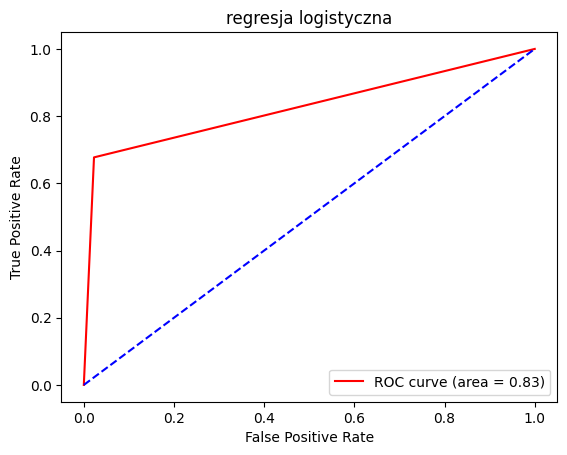

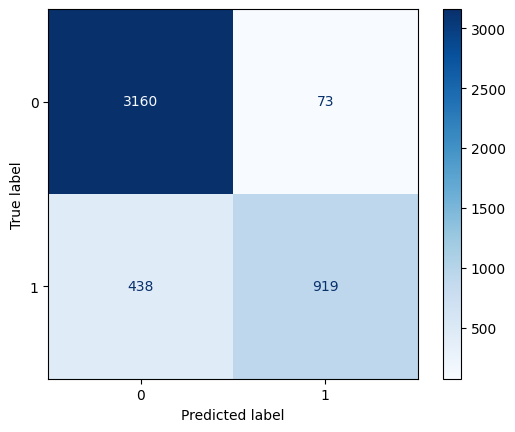

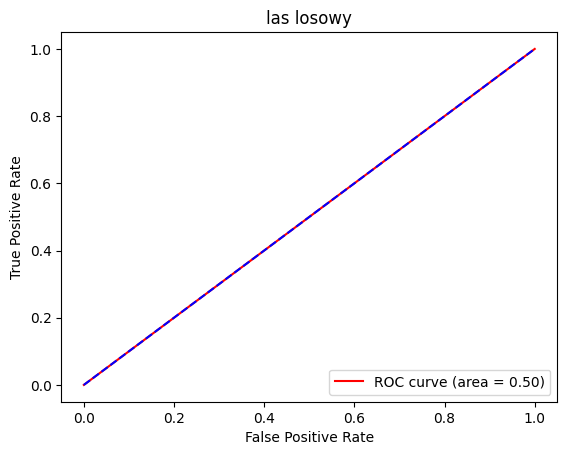

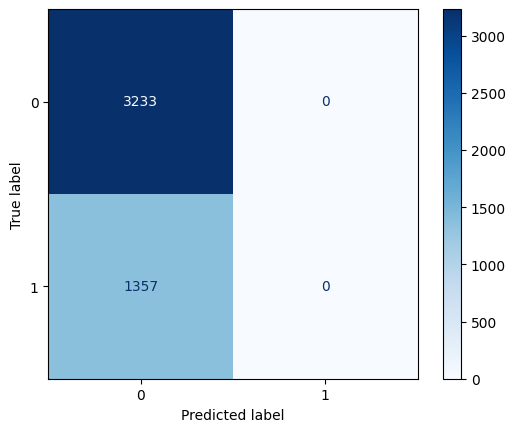

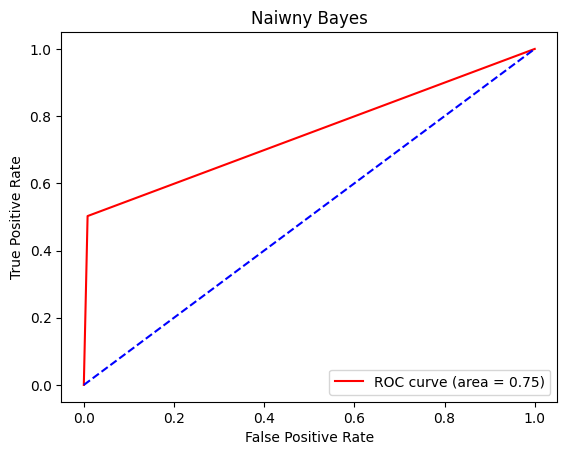

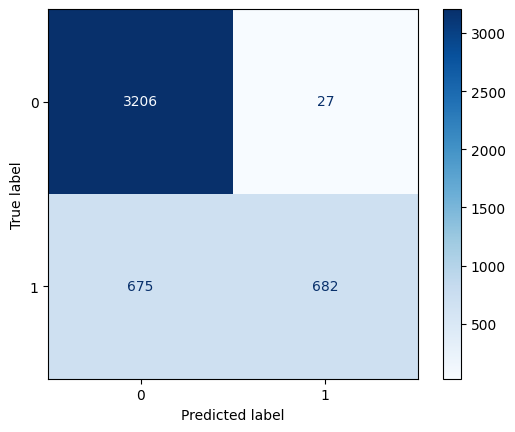

In [13]:
# regresja logistyczna

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plot

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', LogisticRegression(max_iter=1000))])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

draw_roc("regresja logistyczna", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plot.cm.Blues)

# las losowy

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', RandomForestClassifier(max_depth=3, n_estimators=30))])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
draw_roc("las losowy", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plot.cm.Blues)

# naiwny Bayes

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', MultinomialNB())])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
draw_roc("Naiwny Bayes", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plot.cm.Blues)
